In [1]:
import sys
sys.path.append('/local/moreka/broadcast-ref')

In [2]:
%matplotlib inline
from data.user import User
from data.db_connector import DbConnection
import matplotlib.pyplot as plt
import numpy as np
from opt.optimizer import expected_f

In [3]:
conn = DbConnection()
user = User(790728, conn)

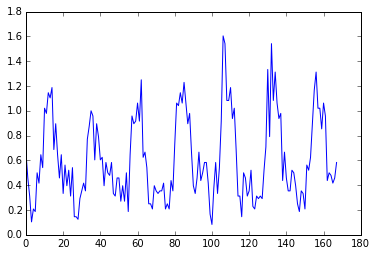

In [4]:
plt.plot(user.intensity().get_as_vector()[0])

In [5]:
len(user.followers())

3189

In [6]:
# target = User(15391594, conn)
target = User(18949502 , conn)

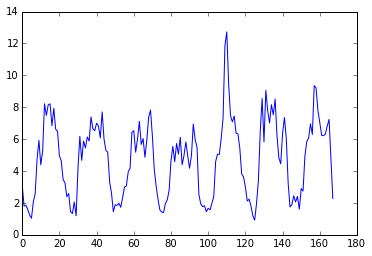

In [7]:
plt.plot(target.wall_intensity(user.user_id()).get_as_vector()[0])

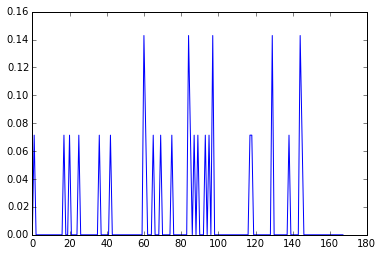

In [8]:
plt.plot(target.intensity().get_as_vector()[0])

In [9]:
best_intensity = user.optimum_intensity(target)

pi:  [0.0, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.0]
iter 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


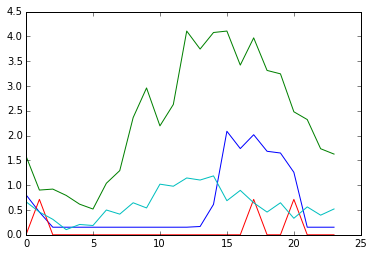

In [10]:
plt.plot(best_intensity.get_as_vector()[0])
plt.plot(np.array(target.wall_intensity(user.user_id()).sub_intensity(0, 24).get_as_vector()[0])/2.0)
plt.plot(np.array(target.connection_probability()[0:24]) * 10.0)
plt.plot(user.intensity().sub_intensity(0, 24).get_as_vector()[0])

In [23]:
e_time_before = expected_f(user.intensity().sub_intensity(0, 24),
                           target.wall_intensity().sub_intensity(0, 24),
                           15, pi=target.connection_probability()[0:24])

e_time_after = expected_f(best_intensity,
                           target.wall_intensity().sub_intensity(0, 24),
                           15, pi=target.connection_probability()[0:24])

print e_time_before, e_time_after
print e_time_before_, e_time_after_

0.147580077754 0.183897525082
0.147588660874 0.183903625518
